In [1]:
import scipy.io

# Load the .mat file
mat = scipy.io.loadmat('Data1Segmented.mat')

# Access the data
print(mat)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Sep  9 20:21:30 2022', '__version__': '1.0', '__globals__': [], 'EEG_Seg': array([[[-18.14799309,  10.08781719, -13.88948631, ...,   1.68951547,
          -8.04169083,   4.98307133],
        [-19.6638298 ,   8.45765495, -14.8315382 , ...,   3.26924944,
          -8.55804253,   5.06516361],
        [-20.57504272,   7.65846539, -15.99520206, ...,   4.6053071 ,
          -8.21252251,   3.62987161],
        ...,
        [ 21.87825966, -11.56868076,  31.16107368, ...,  -2.14432383,
          -3.07943606,  -1.59889746],
        [ 17.31126595, -12.37441063,  30.69745064, ...,  -3.97067595,
          -0.50652146,  -2.32989645],
        [ 13.0664978 , -13.15283394,  31.2642746 , ...,  -6.35453176,
           2.8073194 ,  -2.28981137]],

       [[ -8.25136471,   0.5624966 , -18.67872238, ...,  -7.46124363,
         -11.46789646,   0.99558622],
        [ -6.89742517,  -0.5337494 , -17.34332657, ...,  -4.9437995 ,
          -

**number of EEG segments, number of channels, and number of time points**

In [2]:
print(mat['EEG_Seg'].shape)


(62, 250, 88)


**Visualize a Specific Segment and Channel**

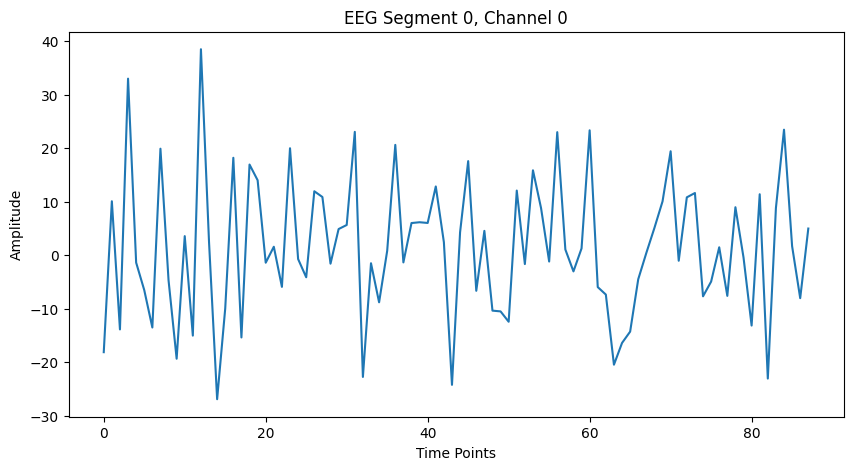

In [3]:
import matplotlib.pyplot as plt

# Extract the first segment and first channel data
segment_index = 0
channel_index = 0
data = mat['EEG_Seg'][segment_index, channel_index, :]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title(f'EEG Segment {segment_index}, Channel {channel_index}')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.show()


**Visualize Multiple Channels from a Single Segment**

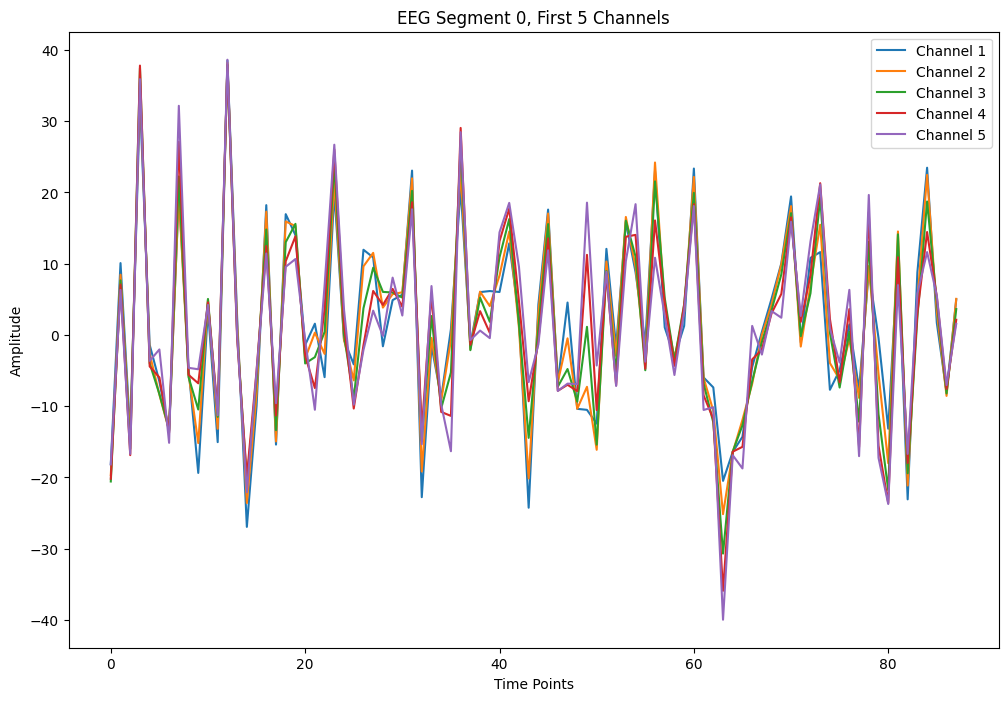

In [4]:
num_channels_to_plot = 5
segment_index = 0

plt.figure(figsize=(12, 8))
for channel_index in range(num_channels_to_plot):
    plt.plot(mat['EEG_Seg'][segment_index, channel_index, :], label=f'Channel {channel_index+1}')

plt.title(f'EEG Segment {segment_index}, First {num_channels_to_plot} Channels')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


**Visualize the EEG Signal as a Heatmap**

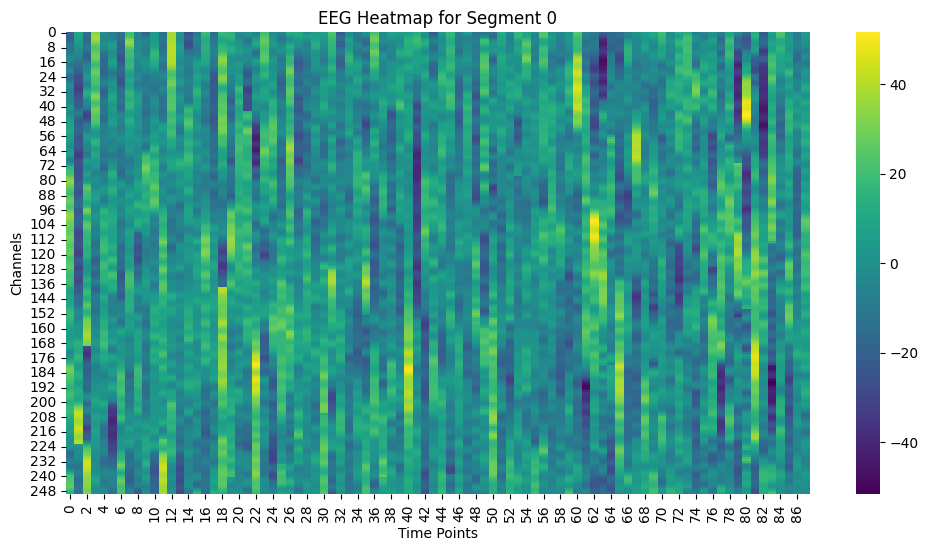

In [5]:
import seaborn as sns
import numpy as np

# Extract data for a specific segment (all channels, all time points)
segment_index = 0
data = mat['EEG_Seg'][segment_index, :, :]

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data, cmap='viridis', cbar=True)
plt.title(f'EEG Heatmap for Segment {segment_index}')
plt.xlabel('Time Points')
plt.ylabel('Channels')
plt.show()


**Overlay Multiple Segments on the Same Plot for a Single Channel**

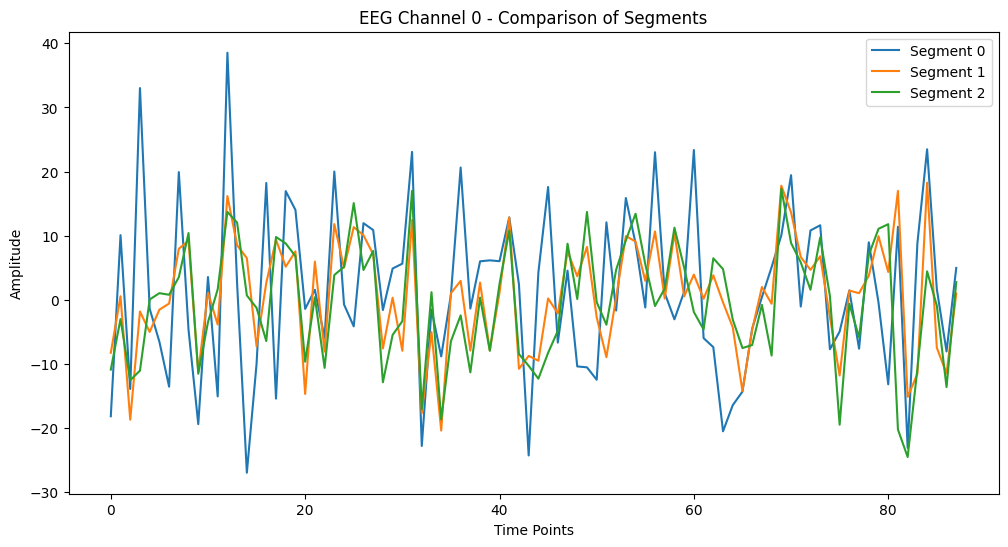

In [9]:
import matplotlib.pyplot as plt

# Parameters
channel_index = 0  # Choose the channel to plot
segments_to_compare = [0, 1, 2]  # List of segment indices to compare

plt.figure(figsize=(12, 6))

# Loop through each segment and plot the data for the selected channel
for segment_index in segments_to_compare:
    data = mat['EEG_Seg'][segment_index, channel_index, :]
    plt.plot(data, label=f'Segment {segment_index}')

# Add labels and title
plt.title(f'EEG Channel {channel_index} - Comparison of Segments')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Plot Segments Side by Side (Subplots) for a Single Channel

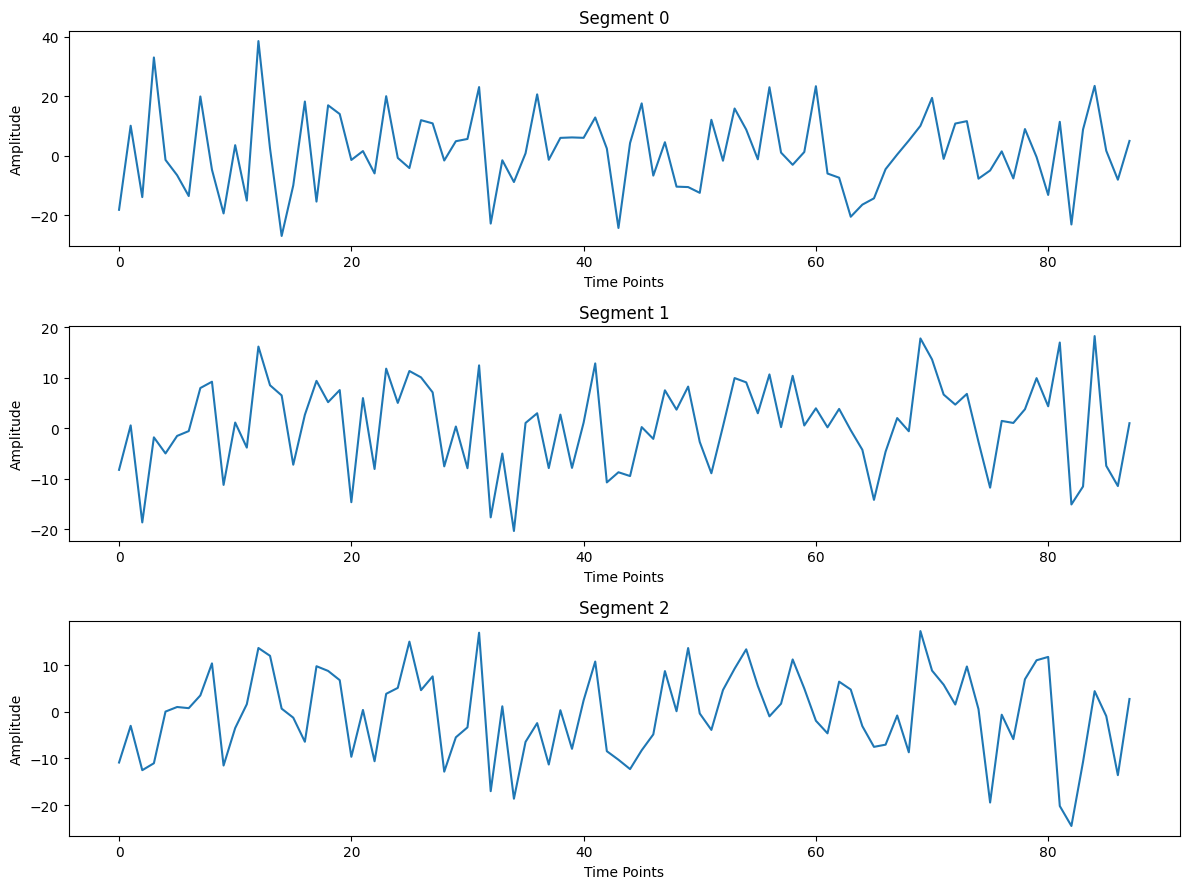

In [10]:
fig, axes = plt.subplots(len(segments_to_compare), 1, figsize=(12, len(segments_to_compare) * 3))

for i, segment_index in enumerate(segments_to_compare):
    data = mat['EEG_Seg'][segment_index, channel_index, :]
    axes[i].plot(data)
    axes[i].set_title(f'Segment {segment_index}')
    axes[i].set_xlabel('Time Points')
    axes[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


**Compare Multiple Segments for Multiple Channels (Heatmap)**

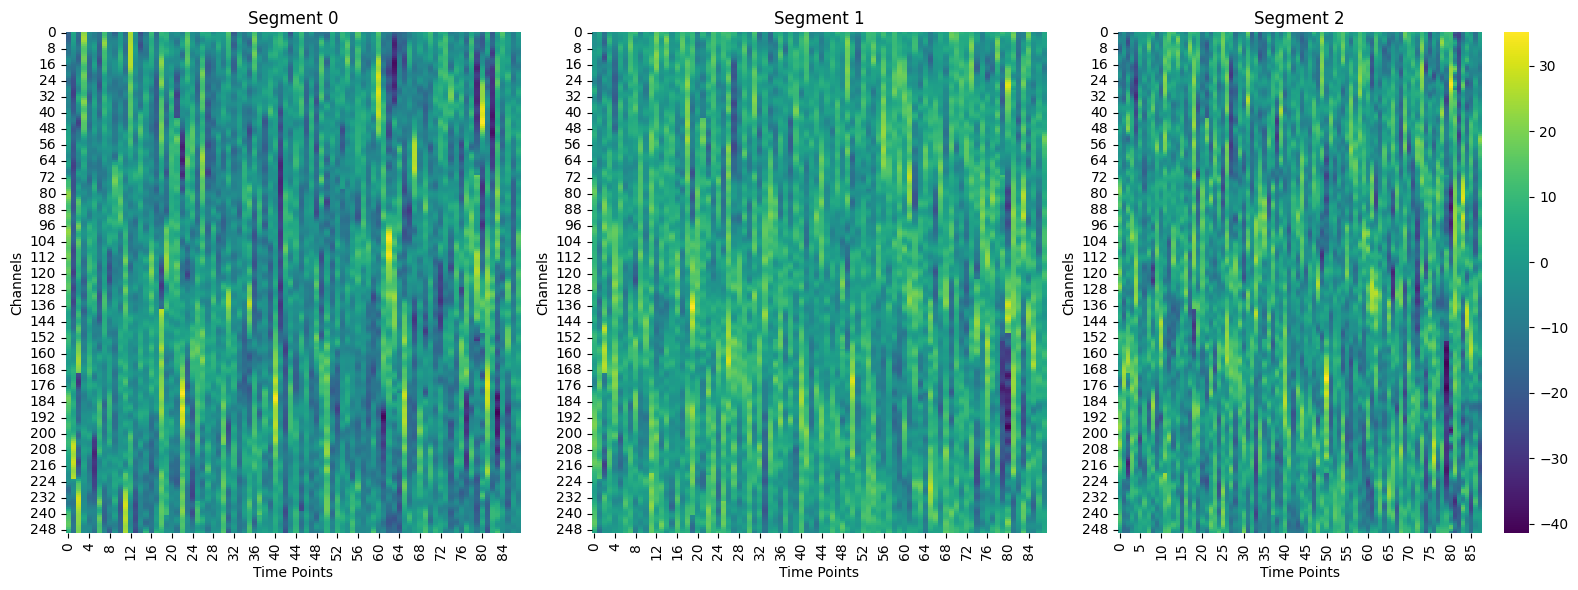

In [11]:
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, len(segments_to_compare), figsize=(16, 6))

for i, segment_index in enumerate(segments_to_compare):
    data = mat['EEG_Seg'][segment_index, :, :]  # All channels, all time points for the segment
    sns.heatmap(data, cmap='viridis', ax=axes[i], cbar=(i == len(segments_to_compare) - 1))  # Color bar on the last one
    axes[i].set_title(f'Segment {segment_index}')
    axes[i].set_xlabel('Time Points')
    axes[i].set_ylabel('Channels')

plt.tight_layout()
plt.show()


**Compare the Mean of Multiple Segments for a Single Channel**

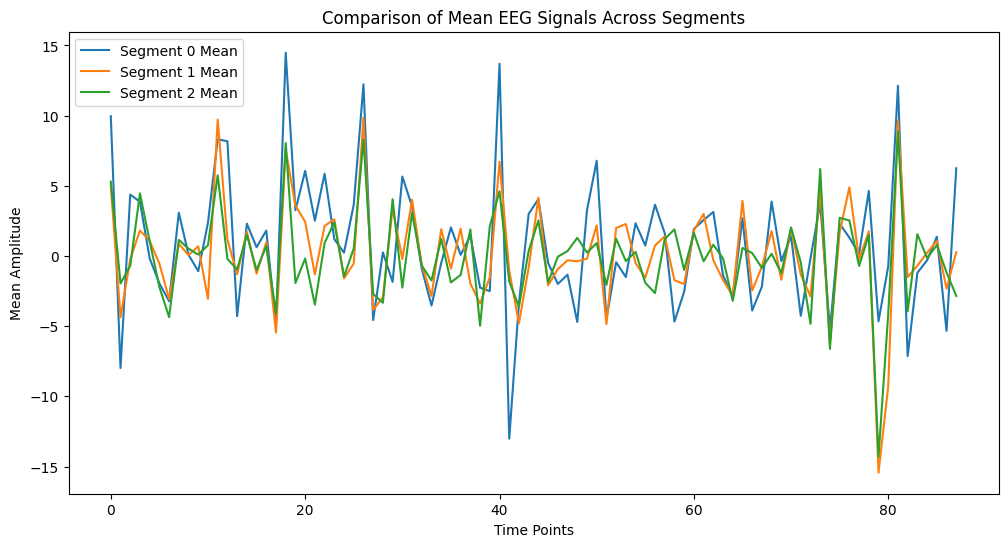

In [12]:
plt.figure(figsize=(12, 6))

for segment_index in segments_to_compare:
    mean_signal = mat['EEG_Seg'][segment_index, :, :].mean(axis=0)  # Mean across channels
    plt.plot(mean_signal, label=f'Segment {segment_index} Mean')

plt.title('Comparison of Mean EEG Signals Across Segments')
plt.xlabel('Time Points')
plt.ylabel('Mean Amplitude')
plt.legend()
plt.show()


**Side-by-Side Comparison of Multiple Channels and Segments (Grid of Subplots)**

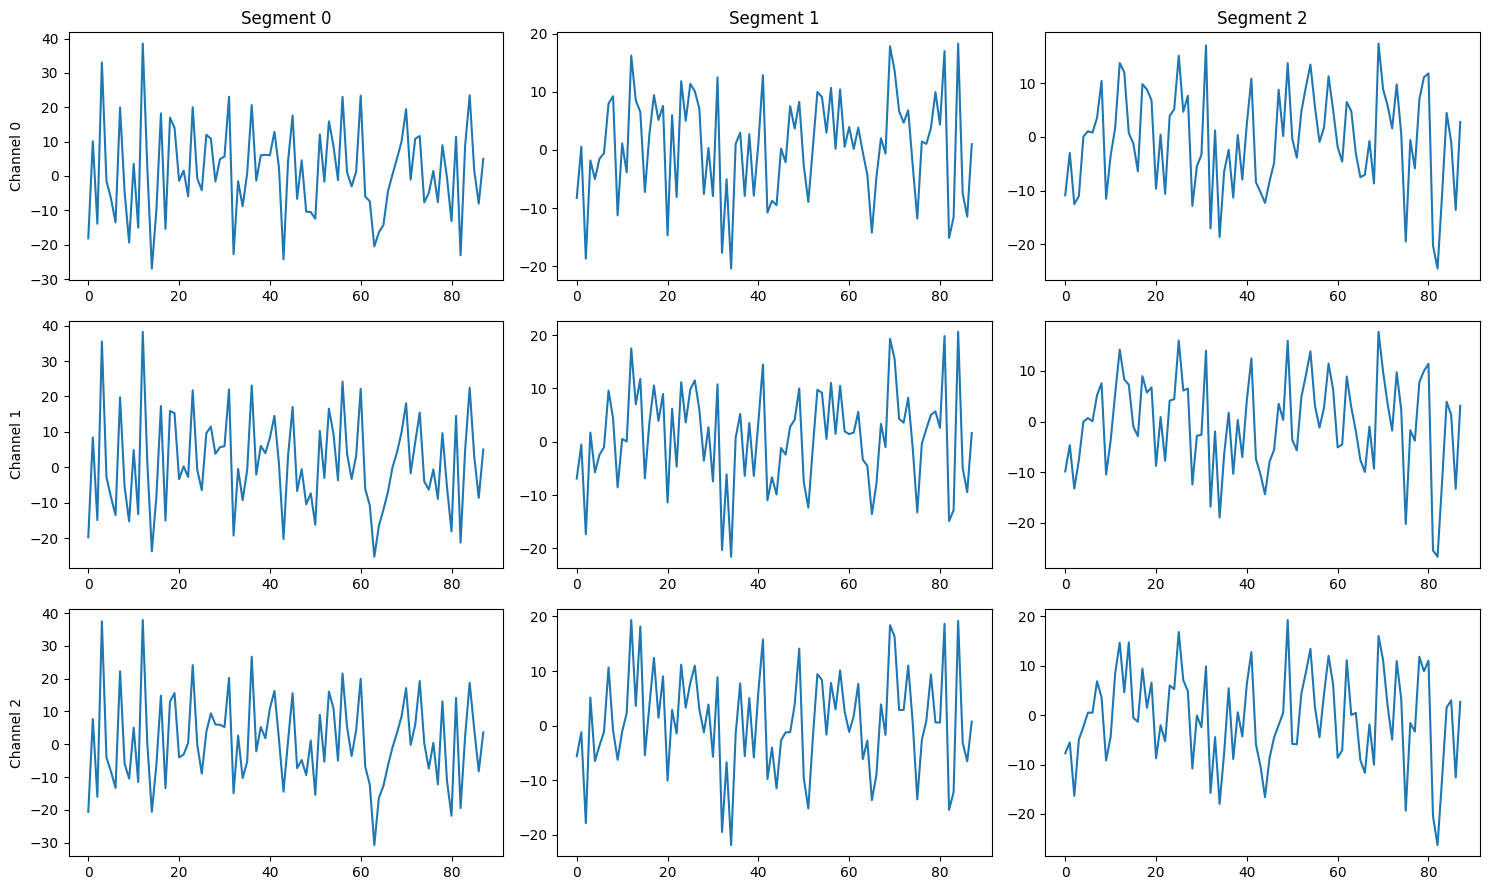

In [13]:
num_channels_to_plot = 3
fig, axes = plt.subplots(num_channels_to_plot, len(segments_to_compare), figsize=(15, num_channels_to_plot * 3))

for channel_index in range(num_channels_to_plot):
    for i, segment_index in enumerate(segments_to_compare):
        data = mat['EEG_Seg'][segment_index, channel_index, :]
        axes[channel_index, i].plot(data)
        if channel_index == 0:
            axes[channel_index, i].set_title(f'Segment {segment_index}')
        if i == 0:
            axes[channel_index, i].set_ylabel(f'Channel {channel_index}')

plt.tight_layout()
plt.show()


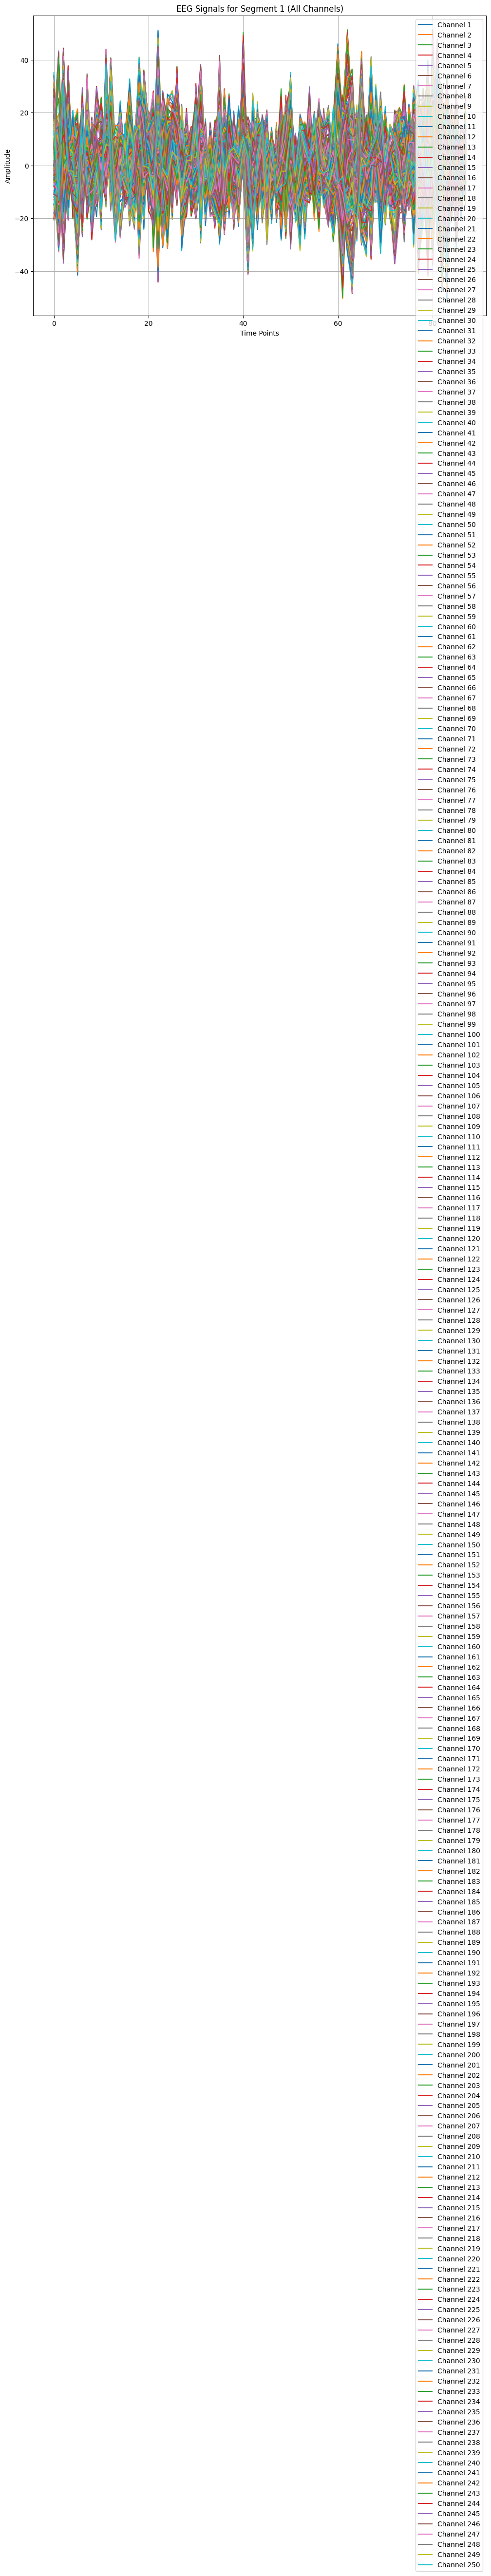

In [19]:
# Select a specific segment (e.g., first segment)
segment = 0

# Extract the EEG data from the correct variable
data = mat['EEG_Seg']

# Plot EEG signals for all channels in the selected segment
plt.figure(figsize=(12, 8))
for channel in range(data.shape[1]):  # Iterate over all channels
    plt.plot(data[segment, channel, :], label=f'Channel {channel + 1}')

plt.title(f'EEG Signals for Segment {segment + 1} (All Channels)')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


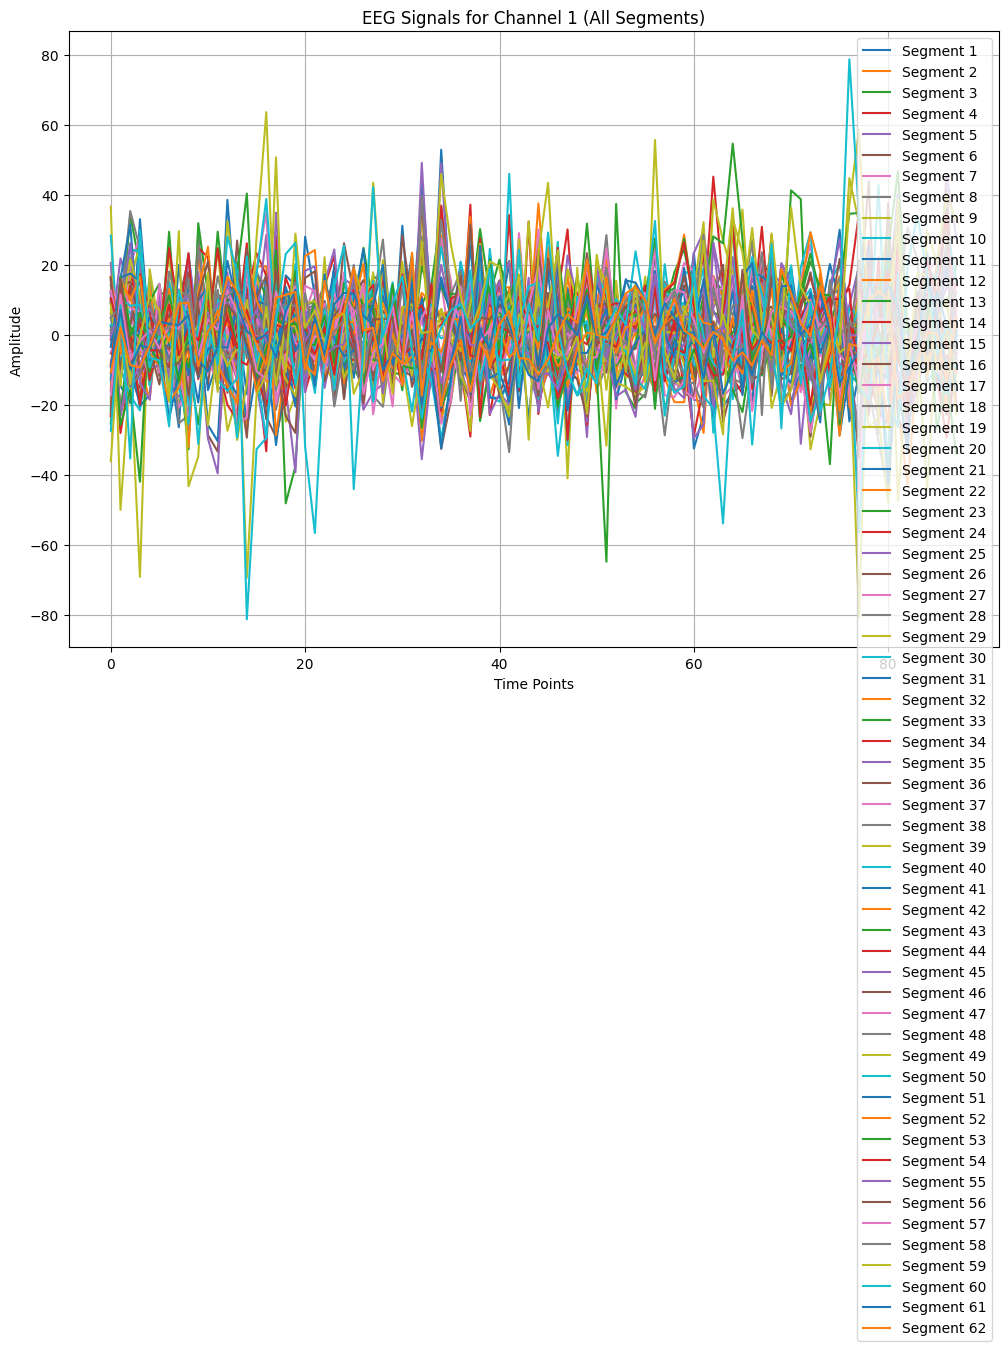

In [20]:
# Select a specific channel (e.g., first channel)
channel = 0

# Plot EEG signals for the selected channel across all segments
plt.figure(figsize=(12, 8))
for segment in range(data.shape[0]):  # Iterate over all segments
    plt.plot(data[segment, channel, :], label=f'Segment {segment + 1}')

plt.title(f'EEG Signals for Channel {channel + 1} (All Segments)')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


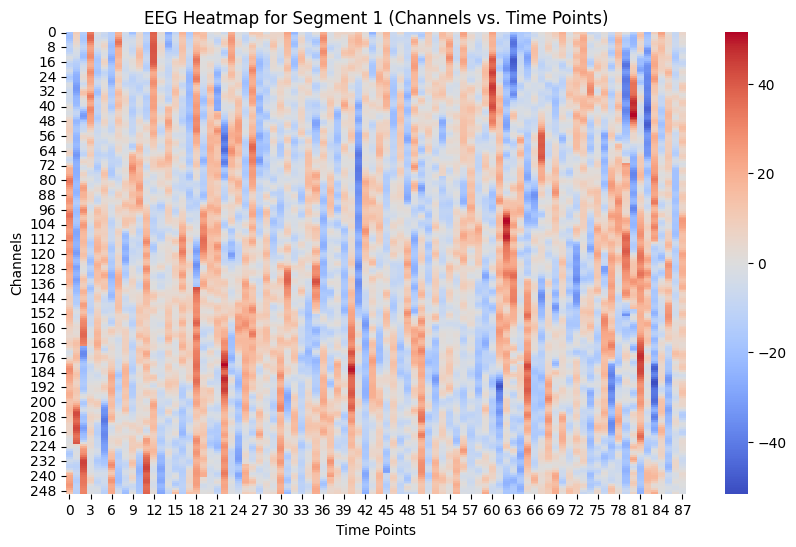

In [21]:
import seaborn as sns

# Select a specific segment (e.g., first segment)
segment = 0

# Plot a heatmap: Channels vs. Time Points for the selected segment
plt.figure(figsize=(10, 6))
sns.heatmap(data[segment, :, :], cmap='coolwarm', cbar=True)
plt.title(f'EEG Heatmap for Segment {segment + 1} (Channels vs. Time Points)')
plt.xlabel('Time Points')
plt.ylabel('Channels')
plt.show()


In [18]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Example: apply bandpass filter (0.5-50 Hz) to a specific channel and segment
fs = 250  # Example sampling rate
lowcut = 0.5
highcut = 50
filtered_data = bandpass_filter(mat['EEG_Seg'][0, 0, :], lowcut, highcut, fs)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1240: UserWarning: nperseg = 256 is greater than input length  = 88, using nperseg = 88
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


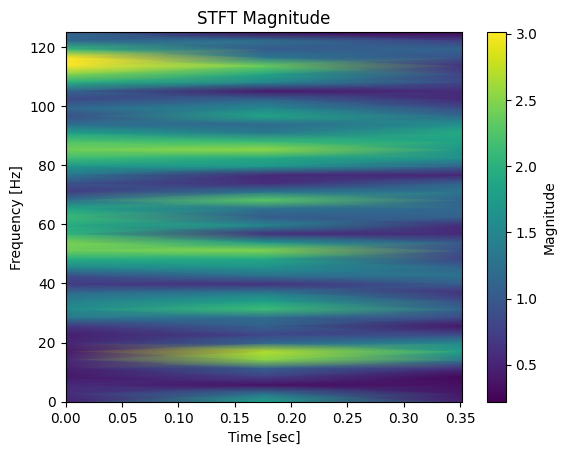

In [22]:
from scipy.signal import stft

def plot_stft(data, fs):
    f, t, Zxx = stft(data, fs=fs)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Plot STFT for a specific segment and channel
plot_stft(mat['EEG_Seg'][0, 0, :], fs)


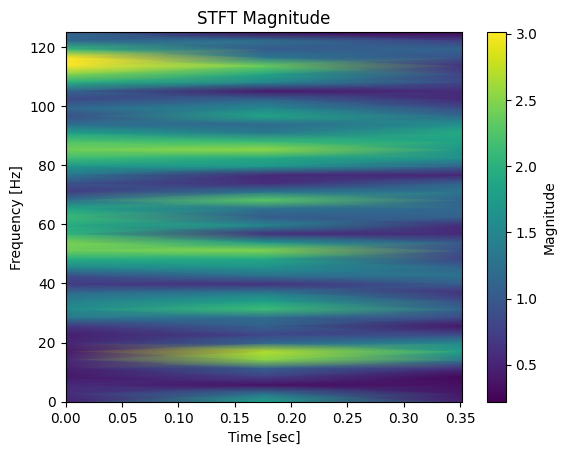

In [23]:
from scipy.signal import stft

def plot_stft(data, fs):
    f, t, Zxx = stft(data, fs=fs)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Plot STFT for a specific segment and channel
plot_stft(mat['EEG_Seg'][0, 0, :], fs)


In [24]:
def band_power(data, fs, band, lowcut, highcut):
    filtered = bandpass_filter(data, lowcut, highcut, fs)
    power = np.sum(filtered**2) / len(filtered)
    return power

# Calculate power in the alpha band (8-12 Hz) for a specific channel and segment
alpha_power = band_power(mat['EEG_Seg'][0, 0, :], fs, 'alpha', 8, 12)
print(f'Alpha Band Power: {alpha_power}')


Alpha Band Power: 3.8872864776755645


In [25]:
from scipy.stats import ttest_ind

# Get mean values for two different segments (e.g., mean of first channel)
segment_0_mean = np.mean(mat['EEG_Seg'][0, 0, :])
segment_1_mean = np.mean(mat['EEG_Seg'][1, 0, :])

# Perform t-test
t_stat, p_val = ttest_ind(mat['EEG_Seg'][0, 0, :], mat['EEG_Seg'][1, 0, :])
print(f'T-test between segment 0 and 1: t-stat={t_stat}, p-value={p_val}')


T-test between segment 0 and 1: t-stat=0.42987798751401735, p-value=0.6678162934624925


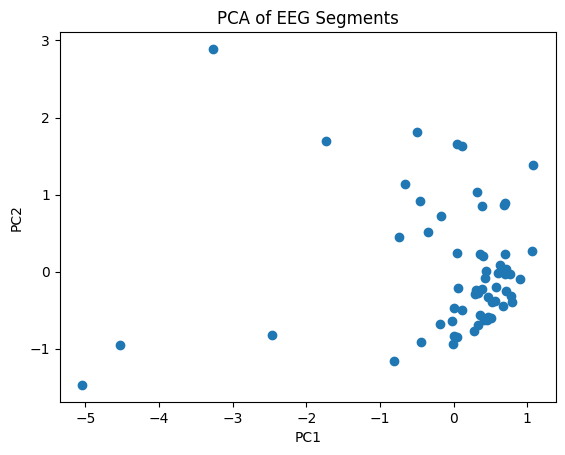

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Feature matrix: mean and variance across channels for each segment
features = np.array([[np.mean(mat['EEG_Seg'][i, :, :]), np.var(mat['EEG_Seg'][i, :, :])] for i in range(mat['EEG_Seg'].shape[0])])

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title('PCA of EEG Segments')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [28]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.4 MB/s eta 0:00:00


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


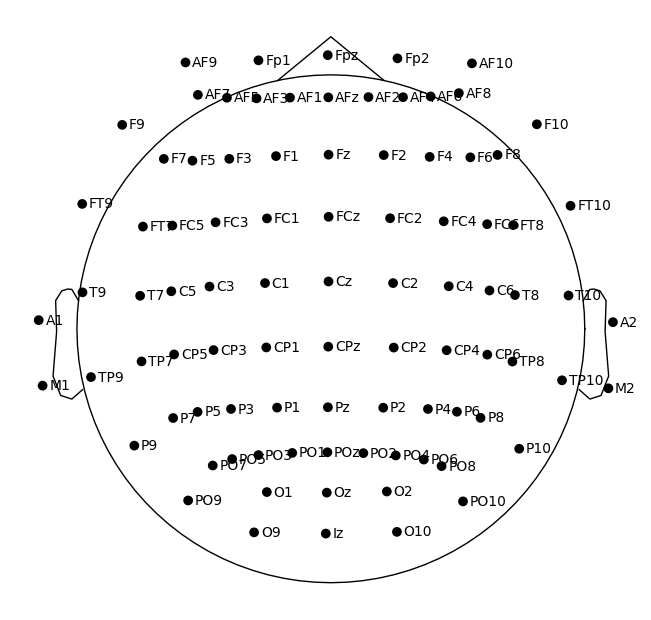

In [29]:
import mne
import matplotlib.pyplot as plt

# Example of standard 10-20 channel names (replace with actual names if you have them)
channel_names = ['Fp1', 'Fp2', 'F7', 'F8', 'F3', 'F4', 'Fz', 'C3', 'C4', 'Cz', 'P3', 'P4', 'Pz', 'O1', 'O2']

# Generate an info structure using MNE to represent the EEG data's sampling rate and channel names
sfreq = 250  # Example sampling frequency, modify according to your data
montage = mne.channels.make_standard_montage('standard_1020')  # Load 10-20 system montage

# Create MNE info object with the sampling frequency and channel names
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')

# Set the montage (the layout of the sensors on the scalp) to the info object
info.set_montage(montage)

# Plot the sensor locations on a 2D head topography
mne.viz.plot_montage(montage, show_names=True)
plt.show()


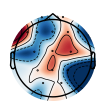

In [30]:
import numpy as np

# Example EEG data (replace with actual signal data): random data as a placeholder
eeg_data = np.random.randn(len(channel_names))

# Plot a topomap of the EEG data
mne.viz.plot_topomap(eeg_data, info)
plt.show()
